In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/3rd_july_datascience/refs/heads/master/farmer_guider/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
group = df.groupby('label')

In [8]:
df['temperature'].min()

8.825674745

In [9]:
tmp_sampleanalysis = group['temperature'].agg(['min','max','mean'])

In [10]:
tmp_sampleanalysis.reset_index(inplace=True)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

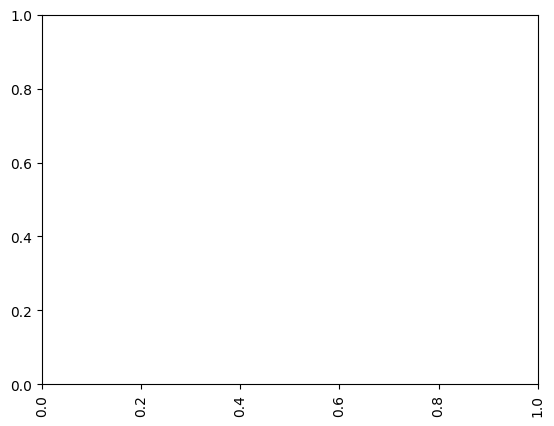

In [11]:
tmp_sampleanalysis
plt.xticks(rotation=90)

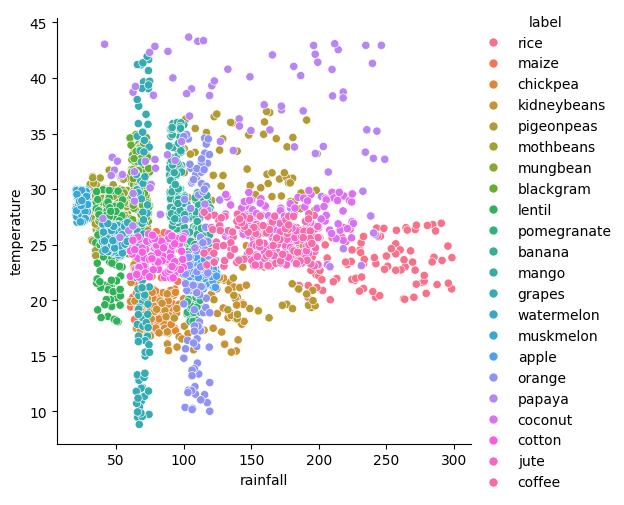

In [12]:
sns.relplot(x='rainfall',y='temperature',data=df,hue='label')
plt.show()

In [16]:
df2 = df.drop(['label'],axis=1) 

In [17]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
from sklearn.preprocessing import StandardScaler 

In [19]:
std_scaler = StandardScaler()

In [20]:
std_scaler.fit(df2)

StandardScaler()

In [21]:
x = std_scaler.transform(df2)

In [23]:
x.shape 

(2200, 7)

In [24]:
from sklearn.cluster import KMeans 

In [25]:
kmeans = KMeans()

In [26]:
## fitting  the kmeasn algorithm 
kmeans.fit(x) 

KMeans()

In [27]:
cluster_no = kmeans.labels_
cluster_no 

array([4, 4, 4, ..., 4, 7, 7])

In [28]:
cluster_no.shape 

(2200,)

In [29]:
x.shape 

(2200, 7)

In [32]:
df['cluster_no'] = cluster_no

In [34]:
df['cluster_no'].unique()

array([4, 7, 1, 0, 3, 6, 2, 5])

In [36]:
cluster_4 = df[df['cluster_no'] == 4]

In [45]:
list(cluster_4['label'].unique())

['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']

In [46]:
import os, joblib 

In [48]:
os.makedirs('models',exist_ok=True) 
joblib.dump(std_scaler,'models/std_scaler.lb')  
joblib.dump(kmeans,'models/kmeans.lb') 

['models/kmeans.lb']